Build a deep learning model which classifies cats and dogs using CNN using pytorch


In [1]:
pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
import zipfile
import os

# Path to the ZIP file (you can upload this to Colab's session storage)
zip_path = '/content/catsndogs.zip'  # Change this to the path of your uploaded ZIP file

# Target directory where the ZIP content will be extracted
extract_to = '/content'

# Check if the extraction directory exists, if not, create it
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print('Extraction Complete')


Extraction Complete


Epoch 1 loss: 0.694, accuracy: 52.97%
Epoch 2 loss: 0.692, accuracy: 53.71%
Epoch 3 loss: 0.691, accuracy: 55.20%
Epoch 4 loss: 0.689, accuracy: 54.70%
Epoch 5 loss: 0.685, accuracy: 55.45%
Finished Training


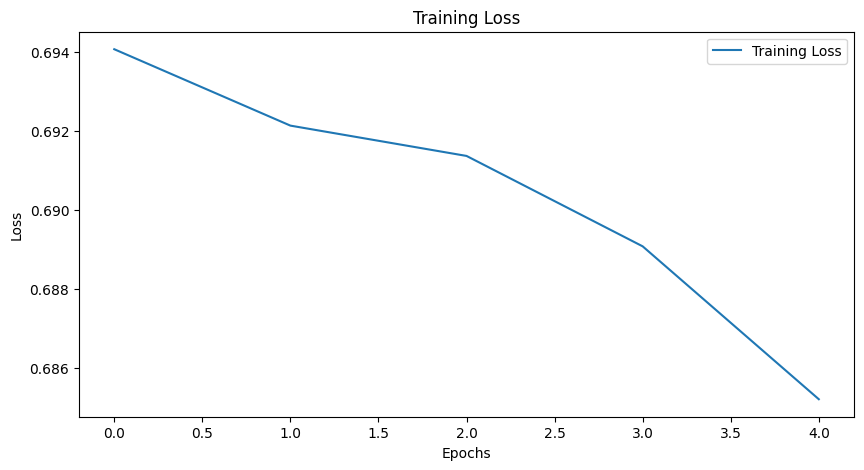

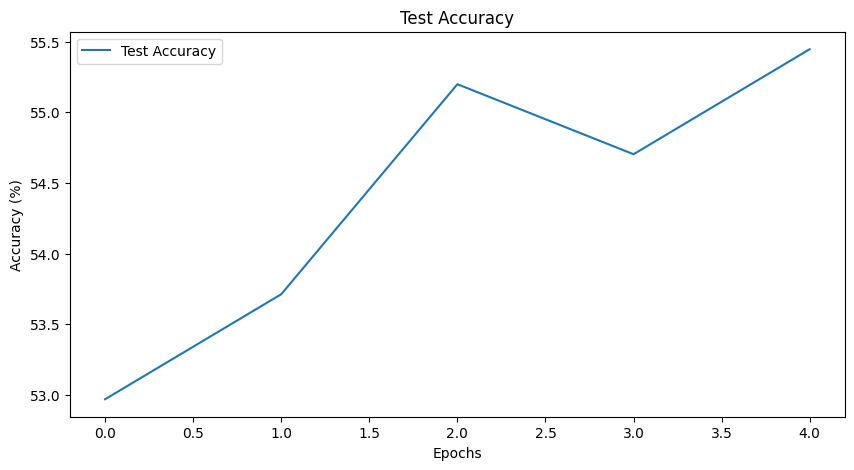

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),        # Convert images to tensor
])

# Set the dataset path
data_path = '/content/catsndogs'

# Load the dataset
dataset = ImageFolder(root=data_path, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

# Define the CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)  # Input channels = 3 (RGB), 16 output channels, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)    # 2x2 Max pooling
        self.conv2 = nn.Conv2d(16, 32, 3) # 32 output channels
        self.fc1 = nn.Linear(32 * 14 * 14, 120)  # Fully connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)       # 2 output classes (cats and dogs)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten all dimensions except the batch dimension
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Initialize lists to monitor loss and accuracy
train_loss = []
test_accuracy = []

# Training the network
for epoch in range(5):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate and store the average loss after each epoch
    avg_loss = running_loss / len(train_loader)
    train_loss.append(avg_loss)

    # Evaluate accuracy on test dataset
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracy.append(accuracy)
    print(f'Epoch {epoch + 1} loss: {avg_loss:.3f}, accuracy: {accuracy:.2f}%')

print('Finished Training')

# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


explanation

Step 1: Prepare Your Dataset
Organize Your Images: Ensure your dataset is structured properly. You should have a ZIP file named catsndogs.zip with two folders inside: cats and dogs. Each folder should contain images of cats or dogs, respectively.
Step 2: Upload the Dataset to Google Colab
Open Google Colab: Go to Google Colab, start a new notebook.
Upload the ZIP File: In the Colab interface, use the file browser on the left to upload your catsndogs.zip from your computer. This can be done by clicking the folder icon and then the file icon with an upward arrow.
Step 3: Unzip the Dataset
Unzip File: Use Python's zipfile module to extract your dataset. You will run a code cell that unzips the file to the /content directory of your Colab environment.
Step 4: Install Necessary Libraries
Install PyTorch and torchvision: Since these libraries may not be pre-installed in your Colab environment, you'll need to install them using pip.
Step 5: Set Up Data Loaders
Prepare Data Loaders: Use PyTorch's torchvision.datasets.ImageFolder to load images and apply transformations such as resizing and normalizing. Split your data into training and testing datasets.
Step 6: Define the CNN Model
Model Architecture: Define a simple CNN architecture in PyTorch. This typically involves layers such as convolutional layers, max pooling, and fully connected layers. Activation functions like ReLU will be used in the model.
Step 7: Set Loss Function and Optimizer
Choose Loss Function and Optimizer: Define an appropriate loss function and an optimizer. For a classification task, CrossEntropyLoss is commonly used alongside optimizers like SGD or Adam.
Step 8: Train the Model
Training Loop: Write a loop to train the model using your data loaders. This involves forwarding the input through the network, calculating the loss, and updating the model's weights with backpropagation.
Step 9: Evaluate the Model
Testing and Validation: Use your test dataset to evaluate the model. Calculate metrics like accuracy to understand the model's performance.
Step 10: Visualize Results
Plotting Metrics: Use matplotlib to plot training and validation metrics such as loss and accuracy over time. This helps in understanding the learning trends and any potential issues like overfitting.
Step 11: Fine-tune and Iterate
Model Improvement: Based on the model's performance, you may need to go back and adjust model parameters, augment your dataset, or try different architectures and hyperparameters.
Step 12: Save and Deploy Model
Save the Trained Model: Save your model's state for future use or deployment. PyTorch models are typically saved using torch.save.